# The happy weather notebook
## The challenge
Start to look at how happiness is related to weather.

You will need to join the weather station data with the happiness data. 
* You will only be able to do this in a coarse-grained way, because the places where there are weather stations do not correspond directly to the census areas used in the happiness surveys. 
    * You could use bands of latitude to do this, 
    * or you could put a grid over the county and look at which grid cell a weather station or census region falls in. 

Don’t worry too much about the fact that weather data and census data don’t cover exactly the same time periods, we can assume that to a first approximation the general climate at a given weather stations is fairly constant over time and that happiness also does not change too much from year to year.

One way to do this is to __measure correlation__ between these datasets. We have not covered this in any detail on the course, so I am not expecting you to do this. 

You should adopt the simpler approach of plotting (possibly a subset of) your weather data against (possibly a subset of) the happiness data. 

Informed by what you see, you should then select one or more weather features and **use linear regression to try to create a model which could potentially predict happiness from the weather data**



In [120]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

In [121]:
weatherPath = '../data/weather/'
happyPath = '../data/happy/'


In [122]:
regionData = pd.DataFrame.from_csv(happyPath+'regions.txt',header=None)
regionData.columns = ['region', 'lat', 'long']
regionData.index.rename('areaCode',inplace=True)
regionData

,region,lat,long
areaCode,,,
E12000001,NORTH EAST,55.0,-1.9
E12000002,NORTH WEST,54.0,-2.6
E12000003,YORKSHIRE AND THE HUMBER,53.6,-1.2
E12000004,EAST MIDLANDS,53.0,-0.8
E12000005,WEST MIDLANDS,52.5,-2.3
E12000006,EAST,52.2,0.4
E12000007,LONDON,51.5,-0.1
E12000008,SOUTH EAST,51.3,-0.5
E12000009,SOUTH WEST,51.0,-3.2


In [123]:
happyData = pd.DataFrame.from_csv(happyPath+'happiness.csv')
happyData

,Area names,averageRating
Area Codes,,
W92000004,Wales,7.40
S92000003,Scotland,7.41
N92000002,Northern Ireland,7.58
E12000001,North East,7.29
E12000002,North West,7.31
E12000003,Yorkshire and The Humber,7.34
E12000004,East Midlands,7.42
E12000005,West Midlands,7.35
E12000006,East,7.43


In [124]:
# Combine region with happy
happyData = happyData.join(regionData[['lat','long']])
happyData

,Area names,averageRating,lat,long
Area Codes,,,,
W92000004,Wales,7.40,51.5,-3.2
S92000003,Scotland,7.41,56.0,-3.2
N92000002,Northern Ireland,7.58,54.6,-5.9
E12000001,North East,7.29,55.0,-1.9
E12000002,North West,7.31,54.0,-2.6
E12000003,Yorkshire and The Humber,7.34,53.6,-1.2
E12000004,East Midlands,7.42,53.0,-0.8
E12000005,West Midlands,7.35,52.5,-2.3
E12000006,East,7.43,52.2,0.4


In [125]:
stationData = pd.DataFrame.from_csv(weatherPath+'stationData.csv',index_col=[0,1,2],parse_dates=False)
stationData

tmax  tmin    af   rain    sun   asml     lat   long  \
station   yyyy mm                                                         
aberporth 1941 1    NaN   NaN   NaN   74.7    NaN  133.0  52.139 -4.570   
               2    NaN   NaN   NaN   69.1    NaN  133.0  52.139 -4.570   
               3    NaN   NaN   NaN   76.2    NaN  133.0  52.139 -4.570   
               4    NaN   NaN   NaN   33.7    NaN  133.0  52.139 -4.570   
               5    NaN   NaN   NaN   51.3    NaN  133.0  52.139 -4.570   
               6    NaN   NaN   NaN   25.7    NaN  133.0  52.139 -4.570   
               7    NaN   NaN   NaN   53.9    NaN  133.0  52.139 -4.570   
               8    NaN   NaN   NaN   91.8    NaN  133.0  52.139 -4.570   
               9    NaN   NaN   NaN   25.5    NaN  133.0  52.139 -4.570   
               10   NaN   NaN   NaN  106.2    NaN  133.0  52.139 -4.570   
               11   NaN   NaN   NaN   92.3    NaN  133.0  52.139 -4.570   
               12   NaN   NaN   NaN   86.5    NaN  133.0  52.139 -4.570   
          1942 1    5.8   2.1   NaN  114.0   58.0  133.0  52.139 -4.570   
               2    4.2   0.6   NaN   13.8   80.3  133.0  52.139 -4.570   
               3    9.7   3.7   NaN   58.0  117.9  133.0  52.139 -4.570   
               4   13.1   5.3   NaN   42.5  200.1  133.0  52.139 -4.570   
               5   14.0   6.9   NaN  101.1  215.1  133.0  52.139 -4.570   
               6   16.2   9.9   NaN    2.3  269.3  133.0  52.139 -4.570   
               7   17.4  11.3   NaN   70.2  185.0  133.0  52.139 -4.570   
               8   18.7  12.3   NaN   78.5  141.9  133.0  52.139 -4.570   
               9   16.4  10.7   NaN  146.8  129.1  133.0  52.139 -4.570   
               10  13.1   8.2   NaN  131.1   82.1  133.0  52.139 -4.570   
               11   9.2   4.6   NaN   19.8   62.9  133.0  52.139 -4.570   
               12   9.6   6.2   NaN  183.9   31.4  133.0  52.139 -4.570   
          1943 1    8.2   3.5   NaN  176.7   41.4  133.0  52.139 -4.570   
               2    8.9   4.6   NaN   65.4   68.6  133.0  52.139 -4.570   
               3   10.2   4.1   NaN   21.0  156.2  133.0  52.139 -4.570   
               4   13.0   6.8   NaN   39.4  178.3  133.0  52.139 -4.570   
               5   14.1   7.4   NaN   83.5  233.3  133.0  52.139 -4.570   
               6   15.9   9.8   NaN   58.7  223.8  133.0  52.139 -4.570   
...                 ...   ...   ...    ...    ...    ...     ...    ...   
yeovilton 2018 1   10.2   2.8   6.0   69.2   55.1   20.0  51.006 -2.641   
               2    7.3   0.1  15.0   28.4  129.3   20.0  51.006 -2.641   
               3    9.3   2.1   9.0  121.4   82.6   20.0  51.006 -2.641   
               4   14.2   7.2   0.0   58.4   99.1   20.0  51.006 -2.641   
               5   19.0   7.4   0.0   45.4  221.6   20.0  51.006 -2.641   
               6   22.8  11.6   0.0    5.6  248.3   20.0  51.006 -2.641   
               7   25.9  13.5   0.0   13.8  242.3   20.0  51.006 -2.641   
               8   22.6  12.8   0.0   53.8  138.5   20.0  51.006 -2.641   
               9   19.6   9.4   0.0   36.4  149.0   20.0  51.006 -2.641   
               10  15.4   6.2   4.0   51.8  132.8   20.0  51.006 -2.641   
               11  12.1   5.3   4.0  102.6   73.8   20.0  51.006 -2.641   
               12  11.0   5.3   2.0   94.2   27.2   20.0  51.006 -2.641   
          2019 1    7.8   1.0  14.0   33.8   53.2   20.0  51.006 -2.641   
               2   11.8   1.9  10.0   47.2  111.4   20.0  51.006 -2.641   
               3   12.3   4.8   2.0   66.0  110.0   20.0  51.006 -2.641   
               4   14.8   4.7   2.0   49.4  155.2   20.0  51.006 -2.641   
               5   17.3   6.1   2.0   17.6  197.3   20.0  51.006 -2.641   
               6   19.4  10.4   0.0   69.2  141.6   20.0  51.006 -2.641   
               7   24.0  12.6   0.0   14.8  221.1   20.0  51.006 -2.641   
               8   22.6  12.4   0.0   38.4  176.6   20.0  51.006 -2.641   
               9   19.9  11.0   0.0   83.8  

In [126]:
# summarise to single value on each station
stations = stationData.index.get_level_values('station').drop_duplicates()
print(stations)
weatherData = pd.DataFrame([stationData.loc[(station,slice(None),month)].median() for station in stations for month in range(1,12+1) ])
keys = [{'station' : station,'month' : month} for station in stations for month in range(1,12+1) ]
weatherData['station'] = [val['station'] for val in keys]
weatherData['month'] = [val['month'] for val in keys]
weatherData.set_index(['station','month'],inplace=True)
weatherData = pd.DataFrame([weatherData.loc[(station,slice(None))].mean() for station in stations])
weatherData['station'] = stations
weatherData.set_index(['station'],inplace=True)
weatherData

Index(['aberporth', 'armagh', 'ballypatrick', 'bradford', 'braemar',
       'camborne', 'cambridge', 'cardiff', 'chivenor', 'cwmystwyth',
       'dunstaffnage', 'durham', 'eastbourne', 'eskdalemuir', 'heathrow',
       'hurn', 'lerwick', 'leuchars', 'lowestoft', 'manston', 'nairn',
       'newtonrigg', 'oxford', 'paisley', 'ringway', 'rossonwye', 'shawbury',
       'sheffield', 'southampton', 'stornoway', 'suttonbonington', 'tiree',
       'valley', 'waddington', 'whitby', 'wickairport', 'yeovilton'],
      dtype='object', name='station')


,tmax,tmin,af,rain,sun,asml,lat,long
station,,,,,,,,
aberporth,12.404167,7.258333,1.041667,71.341667,127.133333,133.0,52.139000,-4.570000
armagh,12.966667,5.733333,2.666667,65.991667,101.925000,62.0,54.352000,-6.649000
ballypatrick,11.345833,5.533333,2.166667,105.983333,104.191667,156.0,55.181000,-6.153000
bradford,12.291667,5.845833,3.083333,67.145833,101.841667,134.0,53.813000,-1.772000
braemar,10.554167,3.754167,8.333333,69.370833,97.479167,339.0,57.005933,-3.397799
camborne,13.483333,8.433333,0.333333,83.820833,130.633333,87.0,50.218000,-5.327000
cambridge,14.308333,6.312500,3.250000,42.787500,123.170833,26.0,52.245000,0.102000
cardiff,14.712500,7.083333,2.416667,92.808333,121.133333,9.0,51.488000,-3.187000
chivenor,14.504167,7.812500,1.500000,71.275000,136.570833,6.0,51.089000,-4.147000


In [127]:
# get closest region
print(happyData[['lat','long']].shape)
print(weatherData[['lat','long']].shape)
from scipy.spatial.distance import cdist
# Get euclidean distance between all regions and all stations. 
stationDist = cdist(weatherData[['lat','long']],happyData[['lat','long']],metric='euclidean')
print(stationDist.shape)
regions = happyData['Area names'].values
print(regions)
for i,station in enumerate(stations): 
    regionIndex = np.argmin(stationDist[i])
    print('{} : {}'.format(station, regions[regionIndex]))
    weatherData.loc[station,'region'] = regions[regionIndex]
    weatherData.loc[station,'areaCode'] = happyData.index.values[regionIndex]
    weatherData.loc[station,'happiness'] = happyData.loc[happyData.index.values[regionIndex],'averageRating']
    weatherData.loc[station,'regionLat'] = happyData.loc[happyData.index.values[regionIndex],'lat']
    weatherData.loc[station,'regionLong'] = happyData.loc[happyData.index.values[regionIndex],'long']
weatherData
    #print(regions[stationDist[i].index()] )

(12, 2)
(37, 2)
(37, 12)
['Wales' 'Scotland' 'Northern Ireland' 'North East' 'North West'
 'Yorkshire and The Humber' 'East Midlands' 'West Midlands' 'East'
 'London' 'South East' 'South West']
aberporth : Wales
armagh : Northern Ireland
ballypatrick : Northern Ireland
bradford : Yorkshire and The Humber
braemar : Scotland
camborne : South West
cambridge : East
cardiff : Wales
chivenor : South West
cwmystwyth : Wales
dunstaffnage : Northern Ireland
durham : North East
eastbourne : London
eskdalemuir : Scotland
heathrow : South East
hurn : South West
lerwick : Scotland
leuchars : Scotland
lowestoft : East
manston : East
nairn : Scotland
newtonrigg : North West
oxford : South East
paisley : Scotland
ringway : North West
rossonwye : West Midlands
shawbury : West Midlands
sheffield : Yorkshire and The Humber
southampton : South East
stornoway : Northern Ireland
suttonbonington : East Midlands
tiree : Northern Ireland
valley : Northern Ireland
waddington : East Midlands
whitby : Yorkshire a

,tmax,tmin,af,rain,sun,asml,lat,long,region,areaCode,happiness,regionLat,regionLong
station,,,,,,,,,,,,,
aberporth,12.404167,7.258333,1.041667,71.341667,127.133333,133.0,52.139000,-4.570000,Wales,W92000004,7.40,51.5,-3.2
armagh,12.966667,5.733333,2.666667,65.991667,101.925000,62.0,54.352000,-6.649000,Northern Ireland,N92000002,7.58,54.6,-5.9
ballypatrick,11.345833,5.533333,2.166667,105.983333,104.191667,156.0,55.181000,-6.153000,Northern Ireland,N92000002,7.58,54.6,-5.9
bradford,12.291667,5.845833,3.083333,67.145833,101.841667,134.0,53.813000,-1.772000,Yorkshire and The Humber,E12000003,7.34,53.6,-1.2
braemar,10.554167,3.754167,8.333333,69.370833,97.479167,339.0,57.005933,-3.397799,Scotland,S92000003,7.41,56.0,-3.2
camborne,13.483333,8.433333,0.333333,83.820833,130.633333,87.0,50.218000,-5.327000,South West,E12000009,7.42,51.0,-3.2
cambridge,14.308333,6.312500,3.250000,42.787500,123.170833,26.0,52.245000,0.102000,East,E12000006,7.43,52.2,0.4
cardiff,14.712500,7.083333,2.416667,92.808333,121.133333,9.0,51.488000,-3.187000,Wales,W92000004,7.40,51.5,-3.2
chivenor,14.504167,7.812500,1.500000,71.275000,136.570833,6.0,51.089000,-4.147000,South West,E12000009,7.42,51.0,-3.2


In [128]:
# Confirming some values correctly calculated.  (at one iteration in this, i spotted that northern island was wrong!)
print(happyData)
print(weatherData[['lat','long','region', 'regionLat', 'regionLong']])

Area names  averageRating   lat  long
Area Codes                                                     
W92000004                      Wales           7.40  51.5  -3.2
S92000003                   Scotland           7.41  56.0  -3.2
N92000002           Northern Ireland           7.58  54.6  -5.9
E12000001                 North East           7.29  55.0  -1.9
E12000002                 North West           7.31  54.0  -2.6
E12000003   Yorkshire and The Humber           7.34  53.6  -1.2
E12000004              East Midlands           7.42  53.0  -0.8
E12000005              West Midlands           7.35  52.5  -2.3
E12000006                       East           7.43  52.2   0.4
E12000007                     London           7.31  51.5  -0.1
E12000008                 South East           7.45  51.3  -0.5
E12000009                 South West           7.42  51.0  -3.2
                       lat      long                    region  regionLat  \
station                                              

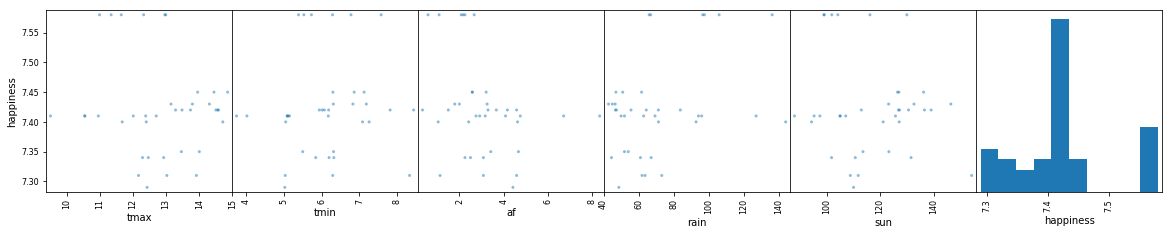

In [133]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 

axi = pd.plotting.scatter_matrix(weatherData[['tmax','tmin','af','rain','sun','happiness']],figsize = (20,20))
# Only show happiness (on the last row)
ok = [a.set_visible(False)  for ax in axi[0:-1] for a in ax]
happyPlot = axi[-1,:]

plt.savefig('../results/happyScatterMatrix.png')

Can't see any strong correlation

In [131]:

X,y = weatherData[['tmax','tmin','af','rain','sun']], weatherData['happiness']
Xtrain,Xtest,yTrain,yTest = sk.model_selection.train_test_split(X,y,train_size=0.6)
reg = LinearRegression().fit(Xtrain,yTrain)

-0.8383519438767142


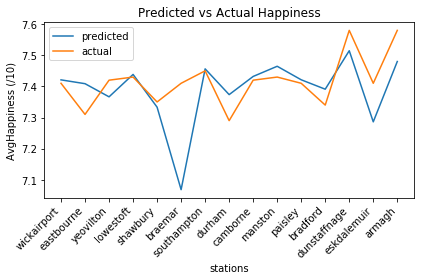

In [132]:
fig,ax = plt.subplots()
ypred = reg.predict(Xtest)
print(reg.score(Xtest,yTest))
plt.plot(ypred,label='predicted')
plt.plot(yTest,label='actual')

for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
plt.ylabel('AvgHappiness (/10)')
plt.xlabel('stations')
plt.legend()
plt.title('Predicted vs Actual Happiness')
plt.tight_layout()
plt.show()
fig.savefig('../results/linearRegression.png')